# Etapa 2 - Conociendo los datos
## Histórico de Precios: Slab (Productos Semiterminado)
### Slab BlackSea
El conjunto de datos se refiere al precio de las losas de acero exportadas desde el Mar Negro, en la región de la Comunidad de Estados Independientes (CIS). Estas losas de acero se comercializan en el mercado internacional bajo condiciones FOB (Free on Board), lo que significa que el vendedor entrega las mercancías en el puerto de carga y el comprador asume los costos y riesgos desde ese punto en adelante.

#### Variables
- $Date$: Fecha en que se registró el precio del producto. Es categórica y sus valores posibles están en formato "d/m/aaaa", desde el primer registro hasta el presente.
- $Low$: Precio más bajo registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por tonelada, desde 0 hasta el máximo registrado.
- $Mid$: Precio medio registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por tonelada, desde 0 hasta el máximo registrado.
- $High$: Precio más alto registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por tonelada, desde 0 hasta el máximo registrado.
- $Mid$ $Change$ $\%$: Cambio porcentual en el precio medio en comparación con el período anterior (nuevo-anterior)/anterior. Es numérica y sus valores posibles están enre -1 (-100%) y el máximo cambio positivo registrado.

#### Librerías

In [21]:
import pandas as pd # Análisis de datos.
import matplotlib.pyplot as plt # Gráficos.
import seaborn as sns # Formato de los gráficos.

#### Comprensión de los datos

In [22]:
# Leer el archivo Excel:
slabBlackSea_df = pd.read_excel('Slab BlackSea.xlsx',
  skiprows=9, nrows=1641-9, engine='openpyxl')

# Mostrar las primeras filas del DataFrame:
slabBlackSea_df

,Date,Low,Mid,High,Mid Change %
0,17/3/2025,448,456.5,465,0.007726
1,11/3/2025,443,453.0,463,0.005549
2,3/3/2025,438,450.5,463,0.023864
3,24/2/2025,435,440.0,445,0.004566
4,17/2/2025,426,438.0,450,0.012717
...,...,...,...,...,...
1626,28/9/1994,150,155.0,160,0.000000
1627,21/9/1994,150,155.0,160,0.000000
1628,14/9/1994,150,155.0,160,0.000000
1629,7/9/1994,150,155.0,160,0.000000


Son 1631 filas y 5 columnas.

Se agruparán los datos anteriores por mes, y se quitará la columna de 'Mid Change %', pues no es de interés para los objetivos de nuestro proyecto. De las demás columnas se obtendrá un promedio mensual.

In [23]:
# Convertir la columna 'Date' a tipo datetime, considerando el formato d/m/aaaa:
slabBlackSea_df['Date'] = pd.to_datetime(slabBlackSea_df['Date'], dayfirst=True)

# Establecer 'Date' como índice:
slabBlackSea_df.set_index('Date', inplace=True)

# Re-muestrear los datos a nivel mensual y obtener el promedio de las columnas 'Low', 'Mid' y 'High':
slabBlackSea_df = slabBlackSea_df.resample('M')[['Low', 'Mid', 'High']].mean()

# Opcional: Reiniciar el índice para tener 'Date' como columna nuevamente:
slabBlackSea_df = slabBlackSea_df.reset_index()

# Formatear la columna 'Date' para mostrar 'NombreMes Año':
slabBlackSea_df['Date'] = slabBlackSea_df['Date'].dt.strftime('%B %Y')

# Mostrar el DataFrame resultante:
slabBlackSea_df

<ipython-input-23-a2eb39ceae79>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  slabBlackSea_df = slabBlackSea_df.resample('M')[['Low', 'Mid', 'High']].mean()


,Date,Low,Mid,High
0,August 1994,150.000000,155.000000,160.000000
1,September 1994,150.000000,155.000000,160.000000
2,October 1994,151.666667,173.333333,195.000000
3,November 1994,155.000000,160.000000,165.000000
4,December 1994,155.000000,160.000000,165.000000
...,...,...,...,...
363,November 2024,450.000000,457.500000,465.000000
364,December 2024,420.000000,438.500000,457.000000
365,January 2025,415.000000,430.375000,445.750000
366,February 2025,422.750000,435.750000,448.750000


Ahora son 368 filas y 4 columnas.

#### Calidad de los datos

In [24]:
# Contar datos nulos de cada columna:
valores_nulos_por_columna = slabBlackSea_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,0
Mid,0
High,0


Los valores nulos no existen en este dataframe.

In [25]:
# Contar registros duplicados:
num_duplicados = slabBlackSea_df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

# Visualizar los registros duplicados (si existen):
if num_duplicados > 0:
    duplicados = slabBlackSea_df[slabBlackSea_df.duplicated()]
    print("Registros duplicados:")
    print(duplicados)

Número de registros duplicados: 0


In [26]:
# Detectar registros con valores fuera del rango esperado:
erroneos = slabBlackSea_df[(slabBlackSea_df['Low'] < 0) | (slabBlackSea_df['Mid'] < 0) | (slabBlackSea_df['High'] < 0)]
print("Registros con valores erróneos en 'Low':")
print(erroneos)

Registros con valores erróneos en 'Low':
Empty DataFrame
Columns: [Date, Low, Mid, High]
Index: []


Los precios están dentro del rango correcto.

In [27]:
slabBlackSea_df.dtypes # Tipos de dato.

,0
Date,object
Low,float64
Mid,float64
High,float64


Todos los datos tienen el tipo correcto.

#### Medidas estadísticas

In [28]:
# Lista de columnas cuantitativas:
numeric_columns = ['Low', 'Mid', 'High']

for col in numeric_columns:
    print(f"Variable: {col}")
    # Medidas de tendencia central:
    media = slabBlackSea_df[col].mean()
    mediana = slabBlackSea_df[col].median()
    # La moda puede devolver más de un valor, por eso se imprime como Series:
    moda = slabBlackSea_df[col].mode()

    # Medidas de dispersión:
    rango = slabBlackSea_df[col].max() - slabBlackSea_df[col].min()
    varianza = slabBlackSea_df[col].var()
    desv_estandar = slabBlackSea_df[col].std()

    print(f"  Promedio/Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {list(moda)}") # Serie a lista para mayor claridad.
    print(f"  Rango (max - min): {rango}")
    print(f"  Varianza: {varianza}")
    print(f"  Desviación Estándar: {desv_estandar}\n")

Variable: Low
  Promedio/Media: 387.7401721014493
  Mediana: 410.0
  Moda: [135.0, 190.0]
  Rango (max - min): 925.25
  Varianza: 33631.19779521701
  Desviación Estándar: 183.38810701683195

Variable: Mid
  Promedio/Media: 398.5550174689441
  Mediana: 422.1875
  Moda: [140.0]
  Rango (max - min): 951.375
  Varianza: 34380.73184062739
  Desviación Estándar: 185.4204191577276

Variable: High
  Promedio/Media: 409.369862836439
  Mediana: 426.875
  Moda: [230.0]
  Rango (max - min): 977.5
  Varianza: 35281.42440871404
  Desviación Estándar: 187.83350182732056



Cada variable tiene sus medidas de tendencia central y dispersión en un rango cercano, 'Low' es bimodal.

In [29]:
# Tabla de distribución de frecuencia para la variable 'Date':
frecuencia_date = slabBlackSea_df['Date'].value_counts().sort_index()
print("Tabla de distribución de frecuencia (Date):")
print(frecuencia_date)
print("\n")

# Ahora, calcular la mediana de la columna 'Date':
median_date = pd.to_datetime(slabBlackSea_df['Date'], dayfirst=True).median()

# Mostrar la mediana formateada:
print("Mediana de las fechas:", median_date.strftime("%B %Y"))

Tabla de distribución de frecuencia (Date):
Date
April 1995        1
April 1996        1
April 1997        1
April 1998        1
April 1999        1
                 ..
September 2020    1
September 2021    1
September 2022    1
September 2023    1
September 2024    1
Name: count, Length: 368, dtype: int64


Mediana de las fechas: November 2009


<ipython-input-29-8aff8c8e6371>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  median_date = pd.to_datetime(slabBlackSea_df['Date'], dayfirst=True).median()


Cada fecha es única.

##### Exploración de datos

In [30]:
# Cuartiles, medidas de posición no-central (no solo la mediana) y detección de outliers:
print("Medidas de posición y dispersión (para variables numéricas):")
for col in ['Low', 'Mid', 'High']:
    Q1 = slabBlackSea_df[col].quantile(0.25)
    Q3 = slabBlackSea_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = slabBlackSea_df[(slabBlackSea_df[col] < (Q1 - 1.5 * IQR)) | (slabBlackSea_df[col] > (Q3 + 1.5 * IQR))][col]

    print(f"\nVariable: {col}")
    print(f"  Cuartil 1 (Q1): {Q1}")
    print(f"  Cuartil 3 (Q3): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Outliers detectados: {list(outliers)}")

Medidas de posición y dispersión (para variables numéricas):

Variable: Low
  Cuartil 1 (Q1): 211.5
  Cuartil 3 (Q3): 495.0
  IQR: 283.5
  Outliers detectados: [991.25, 1055.0, 1055.0, 923.75]

Variable: Mid
  Cuartil 1 (Q1): 217.34375
  Cuartil 3 (Q3): 507.5
  IQR: 290.15625
  Outliers detectados: [945.0, 1028.75, 1085.0, 1085.0]

Variable: High
  Cuartil 1 (Q1): 230.0
  Cuartil 3 (Q3): 520.0
  IQR: 290.0
  Outliers detectados: [970.0, 1066.25, 1115.0, 1115.0]


Cada variable tiene sus medidas de posición en un rango similar.

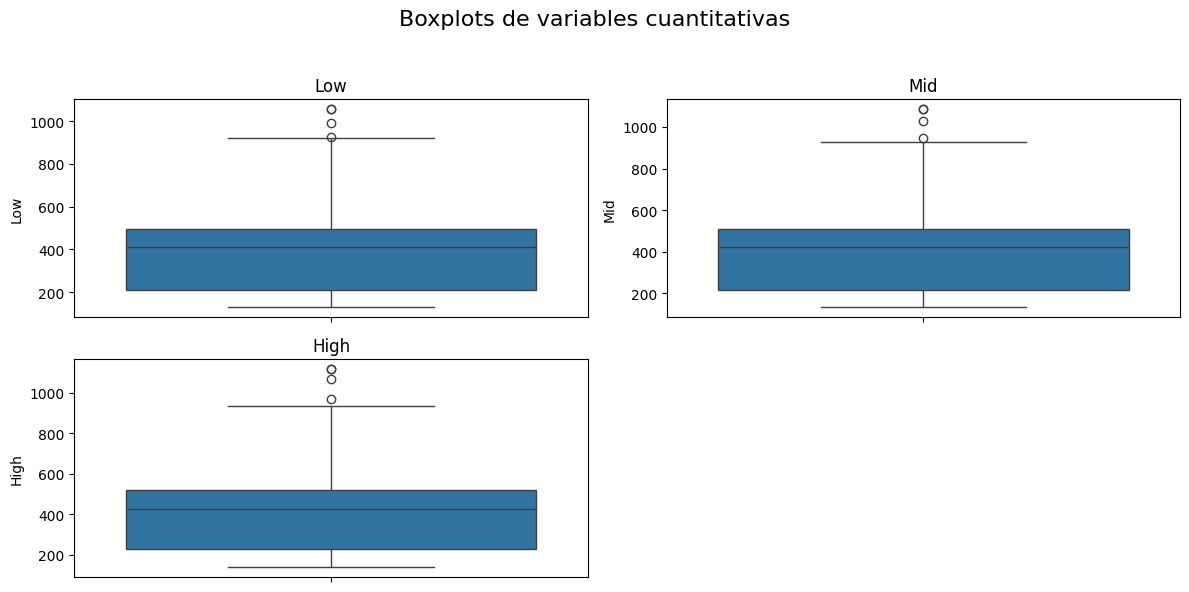

In [31]:
# Boxplots para visualizar la distribución y detectar outliers:
plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=slabBlackSea_df[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Se observa en los boxplots que los datos atípicos se encuentran en los valores altos y que el tercer cuartil está más cerca de la mediana que el primer cuartil.

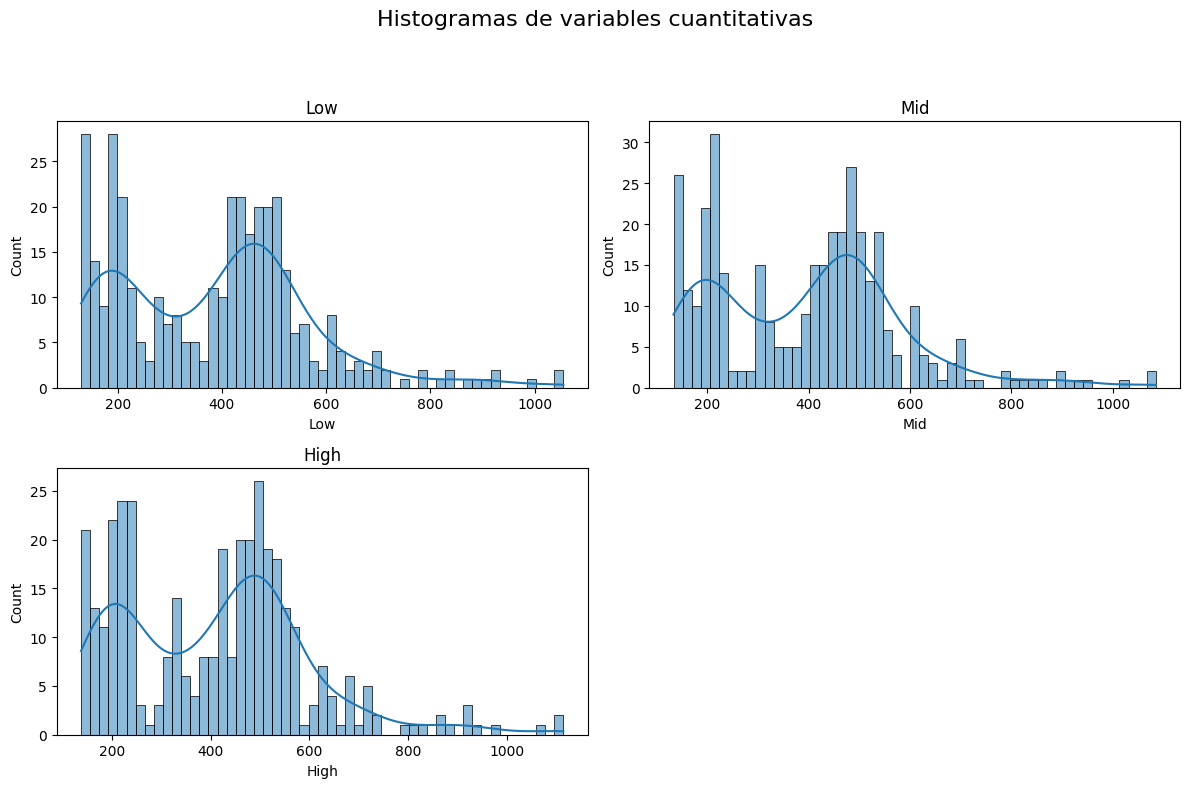

In [32]:
# Histogramas para analizar la distribución y ver la forma (simétrica/asimétrica):
plt.figure(figsize=(12, 8))
plt.suptitle("Histogramas de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(slabBlackSea_df[col], kde=True, bins=53)
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

Se observa un ligero sesgo a la izquierda en la distribución, pues los datos más altos se agrupan más cerca de la mediana.

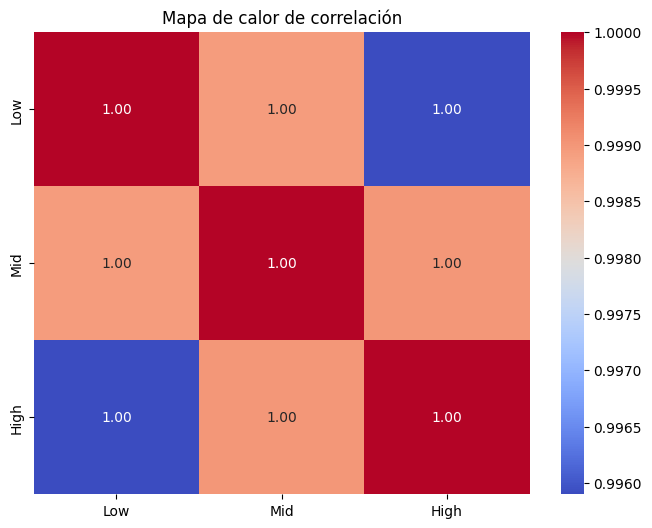

In [33]:
# Mapa de calor de la correlación entre variables numéricas:
plt.figure(figsize=(8, 6))
corr_matrix = slabBlackSea_df[['Low', 'Mid', 'High']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

Todas las variables tienen una casi correlación perfecta positiva.

Cada fecha es única, así que si se quieren ver distribuciones de la variable que no sean uniformes para obtener gráficos de barras y de pastel más interesantes, se puede realizar transformaciones a la variable 'Date'.

#### Exportación de los datos

In [34]:
# Exportar a CSV:
slabBlackSea_df.to_csv('slabBlackSea.csv', index=False)